In [225]:
# Linear Regresssion from Scratch :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
# importing the data
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [227]:
# doing some data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [228]:
# selecting relevant features
data=df
data.drop(["car_ID","CarName"],axis=1,inplace=True)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [229]:
data["fueltype"].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [230]:
data = pd.get_dummies(data, drop_first=True)
# individual columns can also be converted using map function
# data['fueltype'] = data['fueltype'].map({'gas':1,'diesel':0})
# for binary encoding

In [231]:
data
data[data.select_dtypes(bool).columns] = data.select_dtypes(bool).astype(int)
# used for one hot encoded columns
# converting to integer type
# although it couly be done directly using true false too

In [232]:
data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,0,0,0,0,0,0,0,1,0,0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,0,0,0,0,0,0,0,1,0,0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,0,0,0,0,0,0,0,1,0,0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,0,0,0,0,0,1,0,0,0,0


In [233]:
#dividing into features and targets
y=data["price"]
y=y.values 
y


array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [234]:
x=data.drop("price",axis=1)
x=x.values 

# Normalising the data : 
x=(x-np.mean(x,axis=0))/np.std(x,axis=0) 
x

array([[ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 1.74347043, -1.6907718 , -0.42652147, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [ 0.133509  , -0.70859588, -0.23151305, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       ...,
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ..., -0.92024282,
        -0.21428571, -0.070014  ],
       [-1.47645244,  1.72187336,  1.19854871, ...,  1.08666971,
        -0.21428571, -0.070014  ]])

In [235]:

# this function is to initialize weights and bais for the regression model
def init_weights(features):
    bias =0
    weights  = np.zeros(features.shape[1])
    return bias, weights




In [236]:
b,W=init_weights(x) 
print("Initial weights are :",W)
print("Initial bias is :",b)

Initial weights are : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Initial bias is : 0


In [237]:
# calculating the predicted value
def predict(X,weights, bias):
    y_pred = np.dot(X, weights) + bias
    return y_pred

# computing the cost function we use mean squared error
def compute_cost(y_true, y_pred) :
    n = y_true.shape[0]
    cost = (1/(2*n))* np.sum((y_pred-y_true)**2)
    return cost

# gradient descent function to update weights and bias
def gradiant_descent(X,y_true,y_pred,weights,bias,learning_rate):
  dw= (2/X.shape[0])*np.dot(X.T,(y_pred-y_true))
  db= (2/X.shape[0])*np.sum(y_pred-y_true)
  weights=weights-learning_rate*dw
  bias=bias-learning_rate*db
  return weights, bias


In [238]:
iteration=2000
cost_history_train = []
for i in range(iteration): 
    y_pred=predict(x,W,b)  
    cost=compute_cost(y,y_pred) 

    W,b=gradiant_descent(x,y,y_pred,W,b,0.05) 
    if i%100==0: 
        cost_history_train.append(cost)
        print(f"cost at iteration {i} is {cost}")
    

cost at iteration 0 is 119890739.74557047
cost at iteration 100 is 2369676.8756720726
cost at iteration 200 is 2090677.433160819
cost at iteration 300 is 2015188.313601517
cost at iteration 400 is 1984343.632021633
cost at iteration 500 is 1967620.4583472824
cost at iteration 600 is 1957034.6876292934
cost at iteration 700 is 1949767.381448122
cost at iteration 800 is 1944524.867875394
cost at iteration 900 is 1940604.6402601032
cost at iteration 1000 is 1937587.4571608745
cost at iteration 1100 is 1935208.4197404303
cost at iteration 1200 is 1933293.2384959043
cost at iteration 1300 is 1931723.4829980528
cost at iteration 1400 is 1930416.4623217501
cost at iteration 1500 is 1929313.0700193916
cost at iteration 1600 is 1928370.1841606472
cost at iteration 1700 is 1927555.7720615095
cost at iteration 1800 is 1926845.6528671538
cost at iteration 1900 is 1926221.3056137539


In [239]:
y_pred

array([13927.60403606, 13927.60403606, 11949.4111737 , 10317.70470706,
       16828.97673819, 15705.73955247, 19683.411659  , 18999.49666545,
       21742.62517554, 20000.67070254, 13775.87305564, 13494.85143321,
       20421.36170708, 20407.89602843, 21995.37781782, 30452.47095218,
       31408.52289368, 33803.8590491 ,  5156.71195371,  6048.51755644,
        6891.5089404 ,  5622.58642646,  5986.56698561,  9494.80477325,
        6086.16288176,  7312.80379072,  7312.80379072, 10852.72331839,
       10265.11001884, 12964.53879995,  4004.33655915,  7185.38526541,
        5284.02522578,  7229.41050529,  7287.7019017 ,  7831.40539941,
        7449.82151521,  9210.00266996,  9403.09292057,  9962.66993346,
        8372.99409525, 10089.27211301, 10294.30518411,  7924.90696762,
        7195.00779533,  7075.08823686, 11048.21844445, 32358.64805377,
       32358.64805377, 35992.56880063,  4834.97976493,  5976.51888339,
        5994.73494476,  6585.67663718,  6491.56468449, 12139.75261319,
      

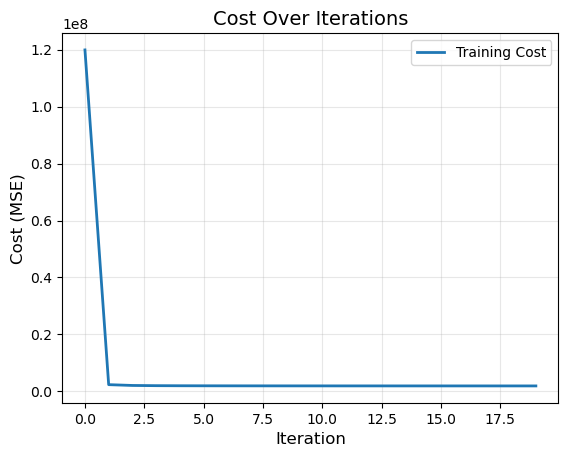

In [240]:
# Visualize the cost over iterations

plt.plot(cost_history_train, label='Training Cost', linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost (MSE)', fontsize=12)
plt.title('Cost Over Iterations', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)